## PALMS

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pylops
import pyproximal

In [118]:
def gradX(A, X, Y):
    g = (X@Y-A)@Y.T
    return g

def gradY(A, X, Y):
    g = X.T@(X@Y-A)
    return g

def LX(X):
    return np.linalg.norm(X.T @ X, 'fro')

def LY(X):
    return np.linalg.norm(Y @ Y.T, 'fro')

def prox(X):
    return np.maximum(0, X)

def prox0(X, n):
    xshape = X.shape
    x = X.ravel()
    nx = x.size
    x[np.argsort(np.abs(x))[:-n]] = 0
    X = x.reshape(xshape)
    return X

In [119]:
def PALM(A, k, gamma1, gamma2, alpha=None, beta=None, niters=4):
    n, m = A.shape
    X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
    Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
    if alpha is not None:
        X = prox0(X, alpha)
    if beta is not None:
        Y = prox0(Y, beta)
    reshist = []
    for iiter in range(niters):
        ck = gamma1 * LY(Y)
        U = X - (1/ck) * gradX(A, X, Y)
        X = prox(U)
        if alpha is not None:
            X = prox0(X, alpha)
        dk = gamma1 * LX(X)
        V = Y - (1/dk) * gradY(A, X, Y)
        Y = prox(V)
        if beta is not None:
            Y = prox0(Y, beta)
        resnorm = np.linalg.norm(A-X@Y)
        reshist.append(resnorm)
        if iiter % 100 == 0:
            print('Iter:%d, Res:%.3f' %(iiter, resnorm))
    return X, Y, reshist

## Non-negative matrix completion

In [120]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = X @ Y

In [121]:
# First run to get PALM-consistent X and Y
X, Y, reshist = PALM(A, k, 2, 2, niters=1000)
A = X @ Y

Xest, Yest, reshist = PALM(A, k, 2, 2, niters=2000)

Iter:0, Res:285.119
Iter:100, Res:103.040
Iter:200, Res:85.916
Iter:300, Res:66.170
Iter:400, Res:48.689
Iter:500, Res:33.825
Iter:600, Res:23.705
Iter:700, Res:16.239
Iter:800, Res:10.983
Iter:900, Res:7.472
Iter:0, Res:299.874
Iter:100, Res:101.464
Iter:200, Res:83.814
Iter:300, Res:64.030
Iter:400, Res:47.378
Iter:500, Res:35.775
Iter:600, Res:28.622
Iter:700, Res:24.042
Iter:800, Res:21.031
Iter:900, Res:19.148
Iter:1000, Res:17.824
Iter:1100, Res:16.632
Iter:1200, Res:15.298
Iter:1300, Res:13.665
Iter:1400, Res:11.729
Iter:1500, Res:9.657
Iter:1600, Res:7.700
Iter:1700, Res:6.044
Iter:1800, Res:4.744
Iter:1900, Res:3.766


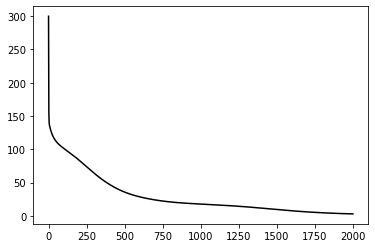

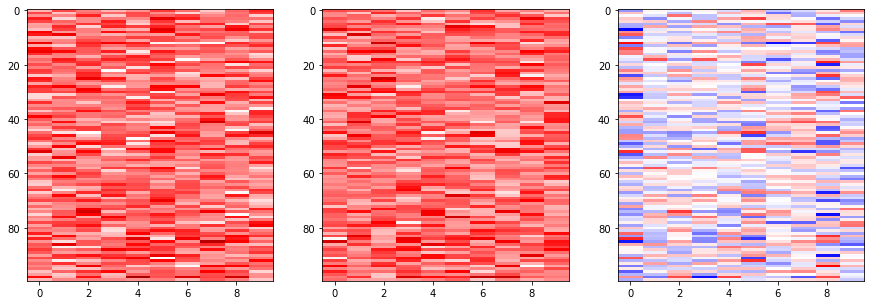

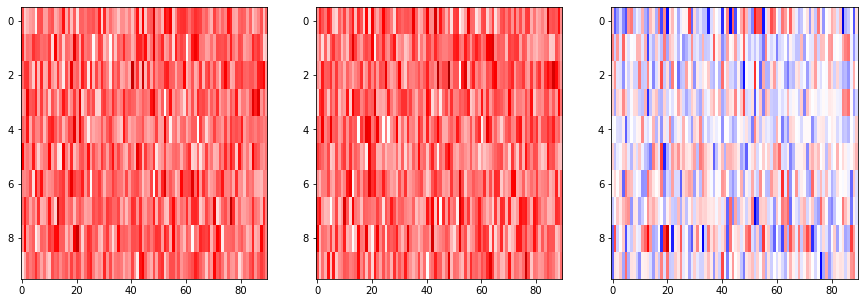

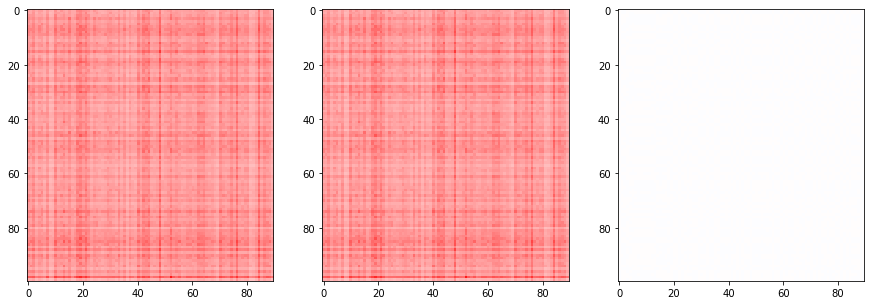

In [122]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[2].axis('tight');

## Non-negative, sparse matrix factorization

In [123]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
alpha, beta = 80, 80

X = prox0(X, alpha)
Y = prox0(Y, beta)

A = X @ Y

In [124]:
# First run to get PALM-consistent X and Y
X, Y, reshist = PALM(A, k, 5., 5., alpha, beta, niters=5000)
A = X @ Y

Xest, Yest, reshist = PALM(A, k, 5., 5., alpha, beta, niters=5000)

Iter:0, Res:275.573
Iter:100, Res:192.054
Iter:200, Res:178.827
Iter:300, Res:175.598
Iter:400, Res:172.169
Iter:500, Res:159.014
Iter:600, Res:157.006
Iter:700, Res:154.007
Iter:800, Res:152.667
Iter:900, Res:152.637
Iter:1000, Res:152.622
Iter:1100, Res:151.418
Iter:1200, Res:150.592
Iter:1300, Res:150.513
Iter:1400, Res:150.501
Iter:1500, Res:142.967
Iter:1600, Res:140.126
Iter:1700, Res:139.322
Iter:1800, Res:138.633
Iter:1900, Res:137.990
Iter:2000, Res:137.658
Iter:2100, Res:137.650
Iter:2200, Res:137.647
Iter:2300, Res:137.645
Iter:2400, Res:137.643
Iter:2500, Res:136.887
Iter:2600, Res:136.701
Iter:2700, Res:136.700
Iter:2800, Res:136.699
Iter:2900, Res:134.953
Iter:3000, Res:134.932
Iter:3100, Res:133.987
Iter:3200, Res:133.501
Iter:3300, Res:130.631
Iter:3400, Res:129.594
Iter:3500, Res:129.508
Iter:3600, Res:129.488
Iter:3700, Res:129.475
Iter:3800, Res:129.461
Iter:3900, Res:129.445
Iter:4000, Res:128.642
Iter:4100, Res:128.339
Iter:4200, Res:128.306
Iter:4300, Res:128.293


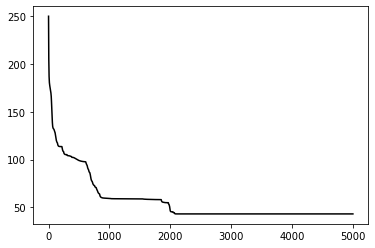

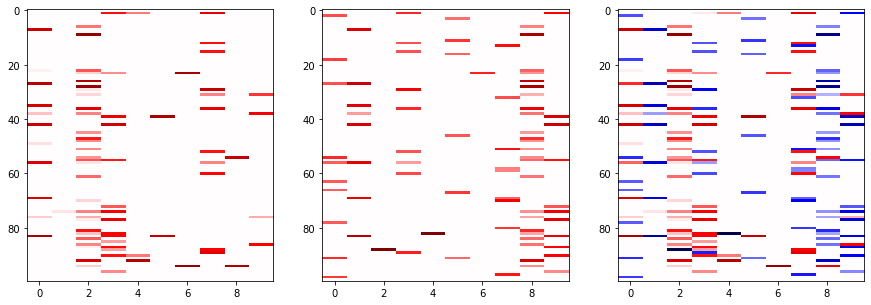

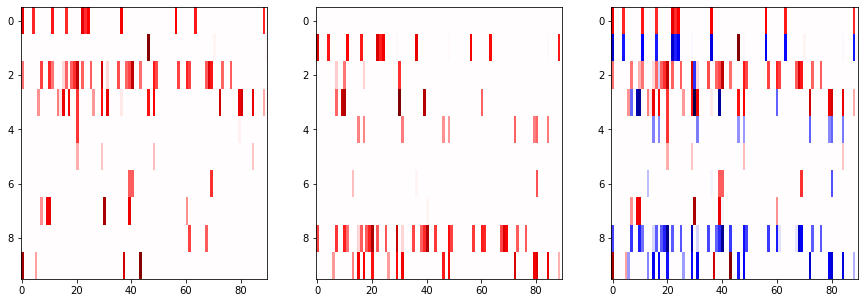

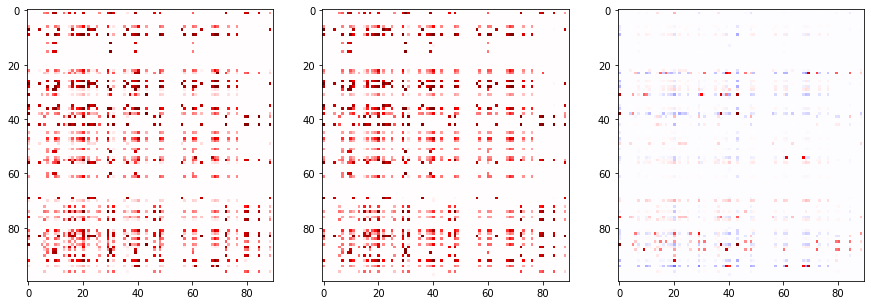

In [125]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-10, vmax=10, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-10, vmax=10, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-10, vmax=10, interpolation='none', cmap='seismic')
axs[2].axis('tight');

## Non-negative matrix factorization (linear op.)

In [126]:
import numpy as np

class FactorizedSVD():
    r"""Factorized SVD operator.
    
    L2 norm of ||y-Op*X||_2^2 where a matrix X=U V^T
    """
    def __init__(self, U, V, y, Op=None, dtype='float64'):
        n, k = U.shape
        m = V.shape[1]
        
        self.U = U
        self.V = V
        self.y = y
        self.Op = Op
        self.shapeu = (n * m, n * k)
        self.shapev = (n * m, m * k)
        
    def updateU(self, U):
        self.U = U
    
    def updateV(self, V):
        self.V = V
    
    def _matvecU(self, u):
        U = u.reshape(n,k)
        X = U @ self.V
        if self.Op is not None:
            X = self.Op * X.ravel()
        return X.ravel()
    
    def _matvecV(self, v):
        V = v.reshape(k,m)
        X = self.U @ V
        if self.Op is not None:
            X = self.Op * X.ravel()
        return X.ravel()
    
    def matvec(self, x):
        if x.size == self.shapeu[1]:
            y = self._matvecU(x)
        else:
            y = self._matvecV(x)
        return y
        
    def gradU(self, u):
        r = self.y - self.matvec(u)
        if self.Op is not None:
            r = (self.Op.H @ r).reshape(n,m)
        else:
            r = r.reshape(n,m)
        g = -r @ self.V.T
        return g
    
    def gradV(self, v):
        r = self.y - self.matvec(v)
        if self.Op is not None:
            r = (self.Op.H @ r.ravel()).reshape(n,m)
        else:
            r = r.reshape(n,m)
        g = -self.U.T @ r 
        return g

In [127]:
n, m, k = 100, 90, 10
U = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
V = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = U @ V
A1 = A + np.random.normal(0,1,(n,m))

Fop = FactorizedSVD(U, V, A1.ravel())

np.allclose(Fop.gradU(U.ravel()), gradX(A1, U, V)), np.allclose(Fop.gradV(V.ravel()), gradY(A1, U, V))

(True, True)

In [128]:
def PALM1(H, n, m, k, gamma1, gamma2, alpha=None, beta=None, niters=4):
    U, V = H.U.copy(), H.V.copy()
    if alpha is not None:
        U = prox0(U, alpha)
    if beta is not None:
        V = prox0(V, beta)
    reshist = []
    for iiter in range(niters):
        ck = gamma1 * LY(V)
        X = U - (1/ck) * H.gradU(U.ravel())
        U = prox(X)
        H.updateU(U.copy())
        if alpha is not None:
            U = prox0(U, alpha)
        dk = gamma1 * LX(U)
        Y = V - (1/dk) * H.gradV(V.ravel())
        V = prox(Y)
        H.updateV(V.copy())
        if beta is not None:
            V = prox0(V, beta)
        resnorm = np.linalg.norm(A-U@V)
        reshist.append(resnorm)
        if iiter % 100 == 0:
            print('Iter:%d, Res:%.3f' %(iiter, resnorm))
    return X, Y, reshist

In [129]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = X @ Y

In [130]:
# First run to get PALM-consistent X and Y
Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, A.ravel())
X, Y, reshist = PALM1(Hop, n, m, k, 2, 2, niters=1000)
A = X @ Y

Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, A.ravel())
Xest, Yest, reshist = PALM1(Hop, n, m, k, 2, 2, niters=2000)

Iter:0, Res:271.706
Iter:100, Res:98.268
Iter:200, Res:78.021
Iter:300, Res:56.741
Iter:400, Res:42.720
Iter:500, Res:33.721
Iter:600, Res:28.417
Iter:700, Res:25.121
Iter:800, Res:21.698
Iter:900, Res:16.985
Iter:0, Res:289.621
Iter:100, Res:98.167
Iter:200, Res:81.896
Iter:300, Res:63.009
Iter:400, Res:48.111
Iter:500, Res:36.415
Iter:600, Res:26.901
Iter:700, Res:20.397
Iter:800, Res:16.593
Iter:900, Res:14.257
Iter:1000, Res:12.492
Iter:1100, Res:10.898
Iter:1200, Res:9.374
Iter:1300, Res:7.942
Iter:1400, Res:6.671
Iter:1500, Res:5.567
Iter:1600, Res:4.622
Iter:1700, Res:3.825
Iter:1800, Res:3.160
Iter:1900, Res:2.609


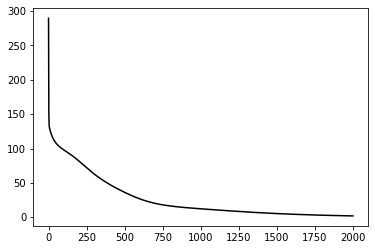

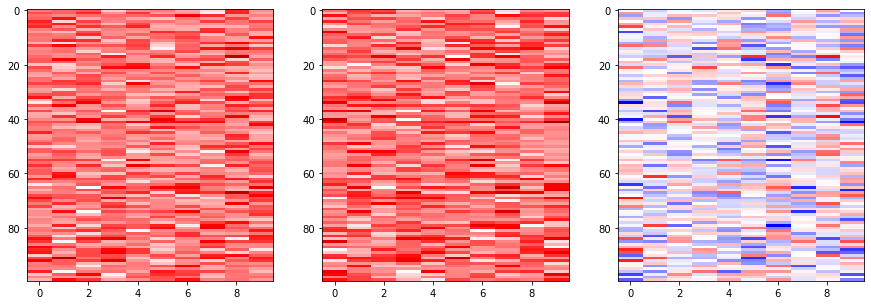

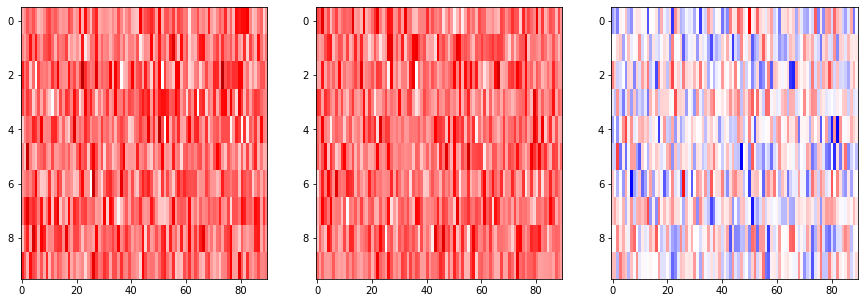

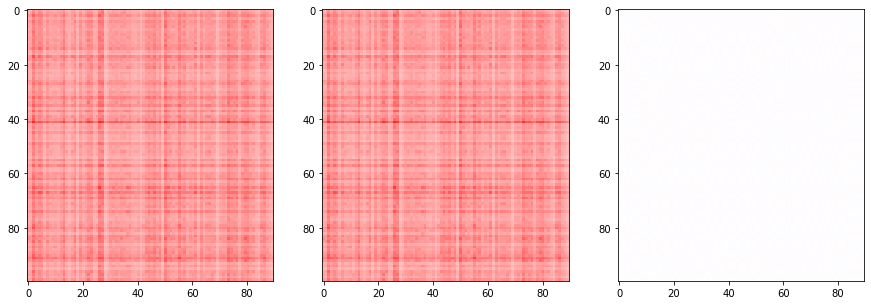

In [131]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[2].axis('tight');

## Non-negative matrix completion (linear op.)

In [132]:
n, m, k = 100, 90, 10
U = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
V = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = U @ V
A1 = A + np.random.normal(0,1,(n,m))

Rop = pylops.Restriction(n*m, np.random.permutation(np.arange(n*m))[:1000])
Fop = FactorizedSVD(U, V, Rop @ A1.ravel(), Op=Rop)

Fop.gradU(U.ravel());
Fop.gradV(V.ravel());

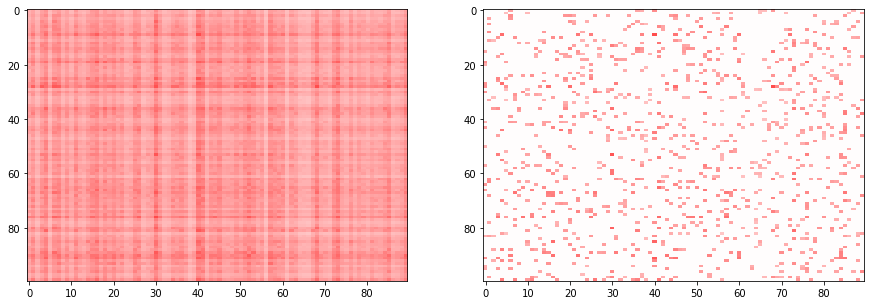

In [133]:
fig, axs = plt.subplots(1, 2,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow((Rop.H*Rop*A.ravel()).reshape(n,m), vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight');

In [134]:
n, m, k = 100, 90, 10
X = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Y = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.

A = X @ Y

In [135]:
# First run to get PALM-consistent X and Y
Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, Rop @ A.ravel(), Op=Rop)
X, Y, reshist = PALM1(Hop, n, m, k, 2, 2, niters=1000)
A = X @ Y

Xin = np.maximum(np.random.normal(0, 1, (n, k)), 0) + 1.
Yin = np.maximum(np.random.normal(0, 1, (k, m)), 0) + 1.
Hop = FactorizedSVD(Xin, Yin, Rop @ A.ravel(), Op=Rop)
Xest, Yest, reshist = PALM1(Hop, n, m, k, 2, 2, niters=2000)

Iter:0, Res:455.275
Iter:100, Res:141.279
Iter:200, Res:137.301
Iter:300, Res:135.932
Iter:400, Res:135.458
Iter:500, Res:135.528
Iter:600, Res:135.932
Iter:700, Res:136.537
Iter:800, Res:137.257
Iter:900, Res:138.037
Iter:0, Res:474.134
Iter:100, Res:139.396
Iter:200, Res:131.131
Iter:300, Res:128.198
Iter:400, Res:126.764
Iter:500, Res:126.078
Iter:600, Res:125.820
Iter:700, Res:125.818
Iter:800, Res:125.969
Iter:900, Res:126.211
Iter:1000, Res:126.505
Iter:1100, Res:126.825
Iter:1200, Res:127.155
Iter:1300, Res:127.485
Iter:1400, Res:127.808
Iter:1500, Res:128.121
Iter:1600, Res:128.422
Iter:1700, Res:128.710
Iter:1800, Res:128.985
Iter:1900, Res:129.247


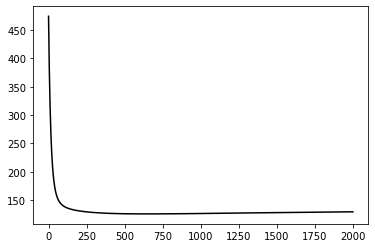

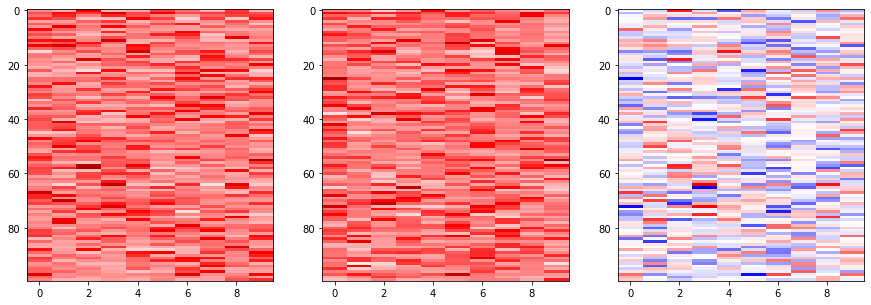

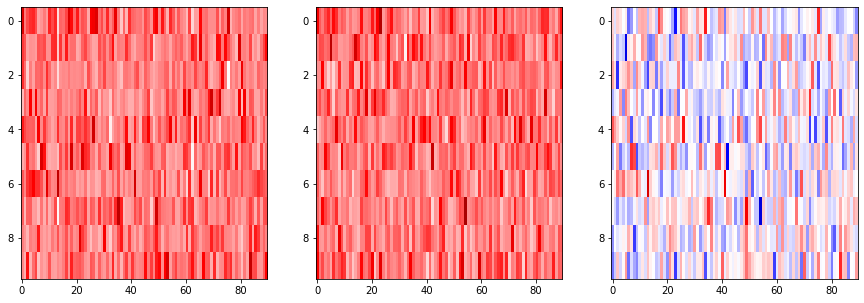

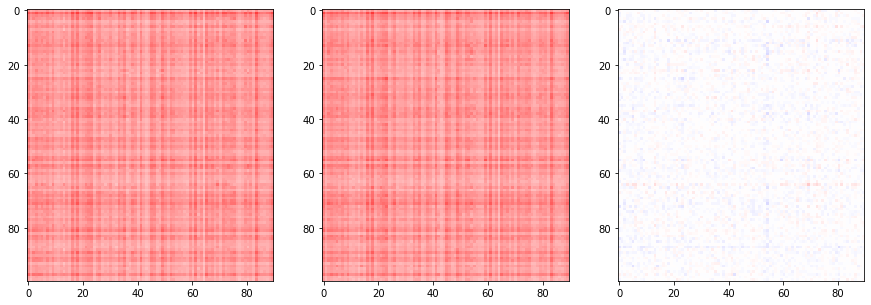

In [136]:
plt.figure()
plt.plot(reshist, 'k')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(X, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(X-Xest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(Y, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(Y-Yest, vmin=-5, vmax=5, interpolation='none', cmap='seismic')
axs[2].axis('tight')

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].imshow(A, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[0].axis('tight')
axs[1].imshow(Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[1].axis('tight')
axs[2].imshow(A-Xest @ Yest, vmin=-100, vmax=100, interpolation='none', cmap='seismic')
axs[2].axis('tight');